In [1]:
#C:/Users/alim10/mini/BiSe_232deg_38p7nm_static_6.h5

In [2]:
#Importing 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

In [3]:
def print_structure(name, obj):
    print(name)
with h5py.File('BiSe_232deg_38p7nm_static_6.h5', 'r') as f:
    f.visititems(print_structure)

scan0
scan0/image
scan0/lastimage
scan0/positions
scan0/temperatures


In [5]:
def get_all_paths(name):
    all_paths.append(name)
all_paths = []

with h5py.File('BiSe_232deg_38p7nm_static_6.h5', 'r') as f:
    f.visit(get_all_paths)

print("--- Available paths in this file ---")
for path in all_paths:
    print(path)

--- Available paths in this file ---
scan0
scan0/image
scan0/lastimage
scan0/positions
scan0/temperatures


In [3]:
#Reading

In [6]:
file_path = 'BiSe_232deg_38p7nm_static_6.h5'

with h5py.File(file_path, 'r') as f:
    for path in ['scan0/image', 'scan0/lastimage', 'scan0/positions', 'scan0/temperatures']:
        data = f[path][()] # Load data into memory
        
        print(f"--- Path: {path} ---")
        print(f"Shape: {data.shape}")
        print(f"Type:  {data.dtype}")
        
        # If it's a small array (like positions or temps), print it all
        # If it's a big image, just print the max/min/mean
        if data.size < 50:
            print(f"Value: {data}")
        else:
            print(f"Stats: Min={data.min()}, Max={data.max()}, Mean={data.mean():.2f}")
        print("-" * 30)

--- Path: scan0/image ---
Shape: (20, 1, 576, 864)
Type:  uint16
Stats: Min=0, Max=11, Mean=0.13
------------------------------
--- Path: scan0/lastimage ---
Shape: (576, 864)
Type:  uint16
Stats: Min=0, Max=7, Mean=0.13
------------------------------
--- Path: scan0/positions ---
Shape: (1,)
Type:  float64
Value: [-140500.]
------------------------------
--- Path: scan0/temperatures ---
Shape: (1, 20)
Type:  float64
Value: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
------------------------------


In [2]:
import h5py
import numpy as np

file_path = 'BiSe_232deg_38p7nm_static_6.h5'

with h5py.File(file_path, 'r') as f:
    for path in ['scan0/image', 'scan0/lastimage', 'scan0/positions', 'scan0/temperatures']:
        data = f[path][()] # Load data into memory
        
        print(f"--- Path: {path} ---")
        print(f"Shape: {data.shape}")
        print(f"Type:  {data.dtype}")
        
        # If it's a small array (like positions or temps), print it all
        # If it's a big image, just print the max/min/mean
        if data.size < 50:
            print(f"Value: {data}")
        else:
            print(f"Stats: Min={data.min()}, Max={data.max()}, Mean={data.mean():.2f}")
        print("-" * 30)

--- Path: scan0/image ---
Shape: (20, 1, 576, 864)
Type:  uint16
Stats: Min=0, Max=11, Mean=0.13
------------------------------
--- Path: scan0/lastimage ---
Shape: (576, 864)
Type:  uint16
Stats: Min=0, Max=7, Mean=0.13
------------------------------
--- Path: scan0/positions ---
Shape: (1,)
Type:  float64
Value: [-140500.]
------------------------------
--- Path: scan0/temperatures ---
Shape: (1, 20)
Type:  float64
Value: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
------------------------------


In [3]:
import matplotlib.pyplot as plt

# Squeeze and sum along the frame axis
img_stack = f['scan0/image'][()].squeeze()
avg_img = np.mean(img_stack, axis=0)

plt.imshow(avg_img, cmap='viridis')
plt.title("Mean Intensity - BiSe Sample")
plt.colorbar(label='Counts')
plt.show()

KeyError: 'Unable to synchronously open object (invalid identifier type to function)'

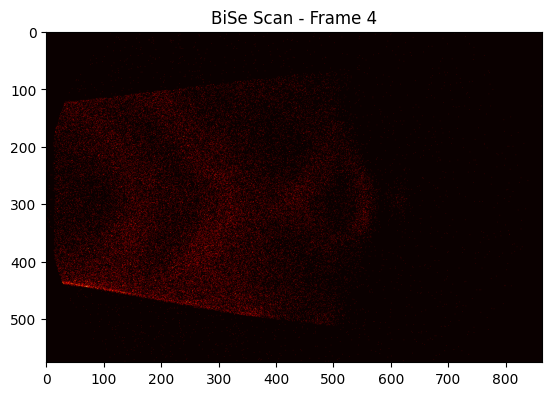

In [13]:
import h5py
import matplotlib.pyplot as plt

file_path = 'BiSe_232deg_38p7nm_static_6.h5'

with h5py.File(file_path, 'r') as f:
    images = f['scan0/image'][()] 
    
    # Let's look at the 5th frame as an example
    # We use [4] for the 5th frame, and [0] to bypass that middle '1' dimension
    frame_index = 4 
    img = images[frame_index, 0, :, :] 

    plt.imshow(img, cmap='hot')
    plt.title(f"BiSe Scan - Frame {frame_index}")
    plt.show()

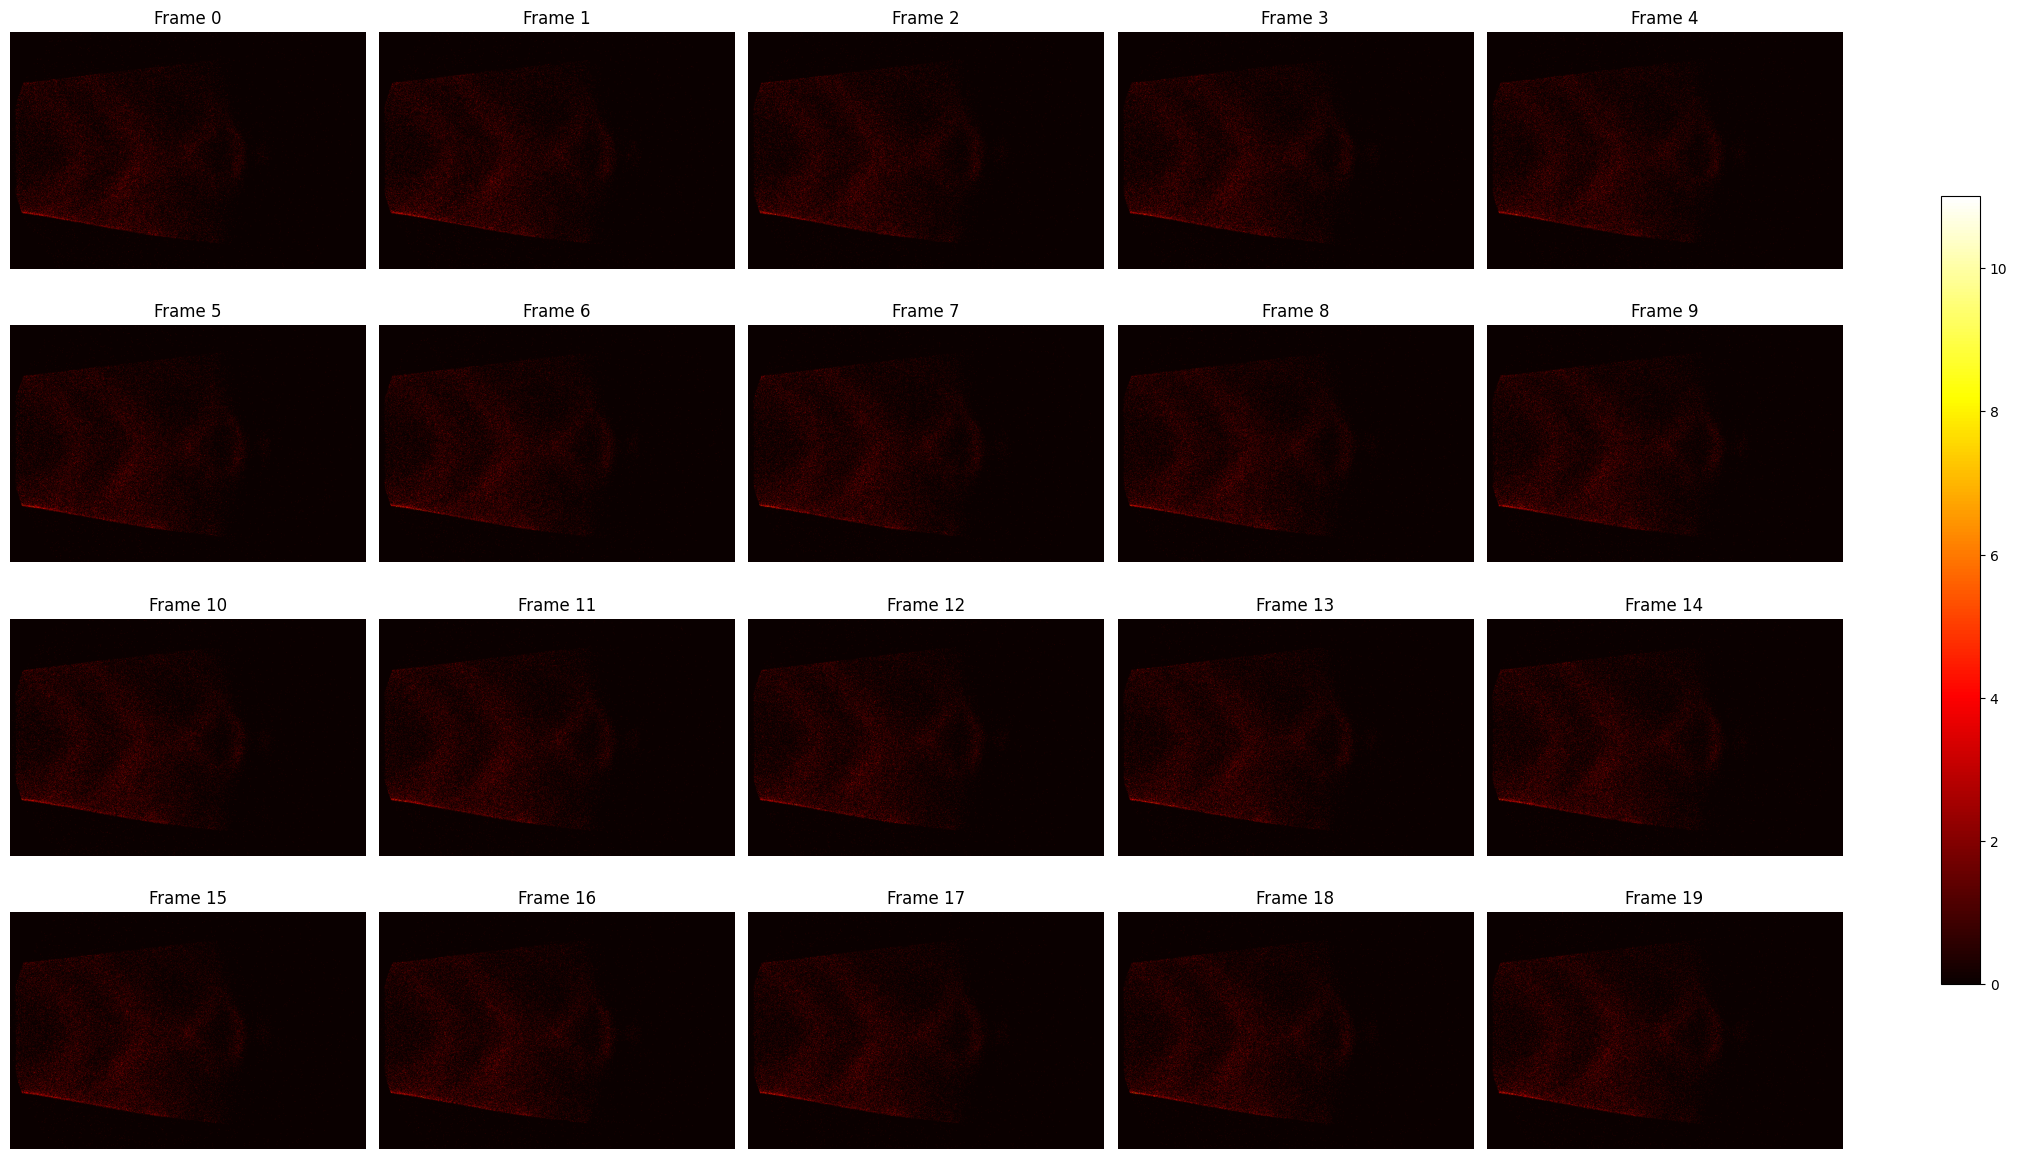

In [11]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

file_path = 'BiSe_232deg_38p7nm_static_6.h5'

with h5py.File(file_path, 'r') as f:
    # 1. Load data and remove the dimension of size 1
    # Shape goes from (20, 1, 576, 864) to (20, 576, 864)
    data = np.squeeze(f['scan0/image'][()])

    # 2. Create a 4x5 grid of plots
    fig, axes = plt.subplots(4, 5, figsize=(20, 12))
    axes = axes.flatten() # Flatten 2D array of axes for easy looping

    # 3. Plot each frame
    for i in range(20):
        # Use a high-contrast colormap since your max value is only 11
        im = axes[i].imshow(data[i], cmap='hot', vmin=0, vmax=11)
        axes[i].set_title(f"Frame {i}")
        axes[i].axis('off') # Hide x/y numbers for a cleaner look

    # 4. Add a single colorbar for the whole figure
    plt.tight_layout()
    fig.colorbar(im, ax=axes.ravel().tolist(), fraction=0.02, pad=0.05)
    plt.show()

In [1]:
import matplotlib.pyplot as plt

# Squeeze and sum along the frame axis
img_stack = f['scan0/image'][()].squeeze()
avg_img = np.mean(img_stack, axis=0)

plt.imshow(avg_img, cmap='viridis')
plt.title("Mean Intensity - BiSe Sample")
plt.colorbar(label='Counts')
plt.show()

NameError: name 'f' is not defined

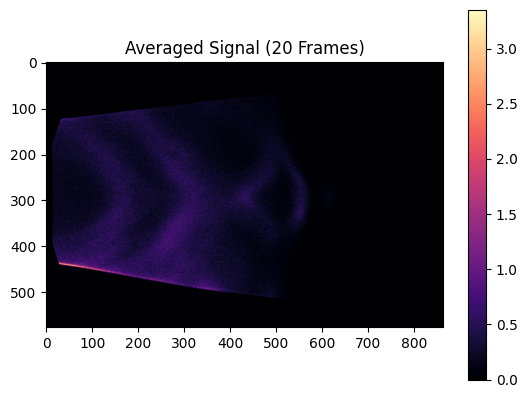

In [12]:
import numpy as np

with h5py.File(file_path, 'r') as f:
    # Load all frames and remove the useless '1' dimension
    # (20, 1, 576, 864) becomes (20, 576, 864)
    all_frames = f['scan0/image'][()].squeeze()
    
    # Average across the 20 frames
    avg_img = np.mean(all_frames, axis=0)
#axes[i].imshow(np.log1p(data[i]), cmap='hot')
    plt.imshow(avg_img, cmap='magma')
    plt.title("Averaged Signal (20 Frames)")
    plt.colorbar()
    plt.show()

In [ ]:
# Change the imshow line to this:
axes[i].imshow(np.log1p(data[i]), cmap='hot')